In [1]:
%matplotlib inline

import sys
import os
sys.path.append(os.path.abspath('../')) # para añadir src al path
idkrom_root_path = os.getcwd()
print(idkrom_root_path)

d:\idkROM\idkROM


# Importamos los modulos necesarios de idkROM para poder usarlo en este notebook.

In [2]:
import os
from src.loader.import_data import DataLoader
from src.pre.preprocessing import Pre
from src.models.neural_network import NeuralNetworkROM
from src.models.gaussian_process import GaussianProcessROM
from src.models.rbf import RBFROM
from src.models.polynomial_response_surface import PolynomialResponseSurface
from src.models.svr import SVRROM


# Preprocesamiento de los datos y creación del pipeline de ejecución de idkROM para el notebook

In [3]:

# === 1. Configuración ===
random_state = 42
loader = DataLoader()
config_dict = loader.read_yml(idkrom_root_path + "/config.yml")
print(f"Configuración cargada: {config_dict}")

# === 2. Carga de datos ===
inputs_file_path = config_dict['data inputs']
outputs_file_path = config_dict['data outputs']
data_source = config_dict['read mode']
if data_source == "raw":
    inputs_df, outputs_df = loader.load_data(input_path=inputs_file_path, output_path=outputs_file_path, data_source="raw")
else:
    inputs_df, outputs_df = loader.load_data(output_path=outputs_file_path, data_source="pre")

# === 3. Preprocesamiento ===
preprocessor = Pre()
scaler_type = 'minmax'
filter_method = 'isolation_forest'
(X_train_normalized, y_train_normalized,
 X_val_normalized, y_val_normalized,
 X_test_normalized, y_test_normalized) = preprocessor.pre_process_data(inputs_df, outputs_df, 0.7, 0.15, 0.15, scaler_type, filter_method, random_state)

# === 4. Selección de modelo ===
def create_model(model_name, rom_config):
    if model_name.lower() == "neural_network":
        return NeuralNetworkROM(rom_config, random_state=random_state)
    elif model_name.lower() == "gaussian_process":
        return GaussianProcessROM(rom_config, random_state=random_state)
    elif model_name.lower() == "rbf":
        return RBFROM(rom_config, random_state=random_state)
    elif model_name.lower() == "response_surface":
        return PolynomialResponseSurface(rom_config, random_state=random_state)
    elif model_name.lower() == "svr":
        return SVRROM(rom_config, random_state=random_state)

# === 5. Ejecución ===
def run_experiment(model_name, hyperparams, mode, eval_metrics):
    rom_config = {
        'input_dim': X_train_normalized.shape[1],
        'output_dim': y_train_normalized.shape[1],
        'hyperparams': hyperparams,
        'mode': mode,
        'model_name': model_name
    }
    print('############################################')
    print(f"Modelo utilizado: {model_name}")
    print(f"Configuración del modelo: {rom_config}")

    # Inicializar y entrenar
    model = create_model(model_name, rom_config)
    model.train(X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized)
    
    # Predicción y evaluación
    y_pred = model.predict(X_test_normalized)
    model.evaluate(X_test_normalized, y_test_normalized, y_pred, eval_metrics)
    return model, y_pred



Configuración cargada: {'data inputs': 'D:\\\\idkROM\\\\idkROM\\\\data\\\\main_platoHydr_idkFEM_DOE_Results copy_inputs.csv', 'data outputs': 'D:\\\\idkROM\\\\idkROM\\\\data\\\\main_platoHydr_idkFEM_DOE_Results copy_outputs.csv', 'read mode': 'raw', 'scaler': 'MinMaxScaler', 'validation': 'single | cross', 'test size': 0.15, 'model type': 'rbf', 'mode': 'manual', 'hyperparams': {'n_iter': 10, 'cv': 5, 'gamma': 1.0}, 'eval metrics': 'mse', 'plot': True, 'save': True}
Preprocessed data saved.


# Usamos la red neuronal (2 tests)

Configuración de hiperparametros:

    n_layers: 2

    n_neurons: 10

    activation: Tanh

    optimizer: Adam

    learning_rate: 0.01

    epochs: 1000


############################################
Modelo utilizado: neural_network
Configuración del modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'n_layers': 2, 'n_neurons': 10, 'activation': 'Tanh', 'optimizer': 'Adam', 'learning_rate': 0.01, 'epochs': 1000}, 'mode': 'manual', 'model_name': 'neural_network'}
Iniciando Cross-Validation con 5 folds.
Fold 1/5
  Fold 1, Epoch 0/1000, Training Loss: 0.273774, Validation Loss: 0.261349
  Fold 1, Epoch 100/1000, Training Loss: 0.269041, Validation Loss: 0.261349
  Fold 1, Epoch 200/1000, Training Loss: 0.271976, Validation Loss: 0.261349
  Fold 1, Epoch 300/1000, Training Loss: 0.266595, Validation Loss: 0.261349
  Fold 1, Epoch 400/1000, Training Loss: 0.270517, Validation Loss: 0.261349
  Fold 1, Epoch 500/1000, Training Loss: 0.260837, Validation Loss: 0.261349
  Fold 1, Epoch 600/1000, Training Loss: 0.271468, Validation Loss: 0.261349
  Fold 1, Epoch 700/1000, Training Loss: 0.266134, Validation Loss: 0.26

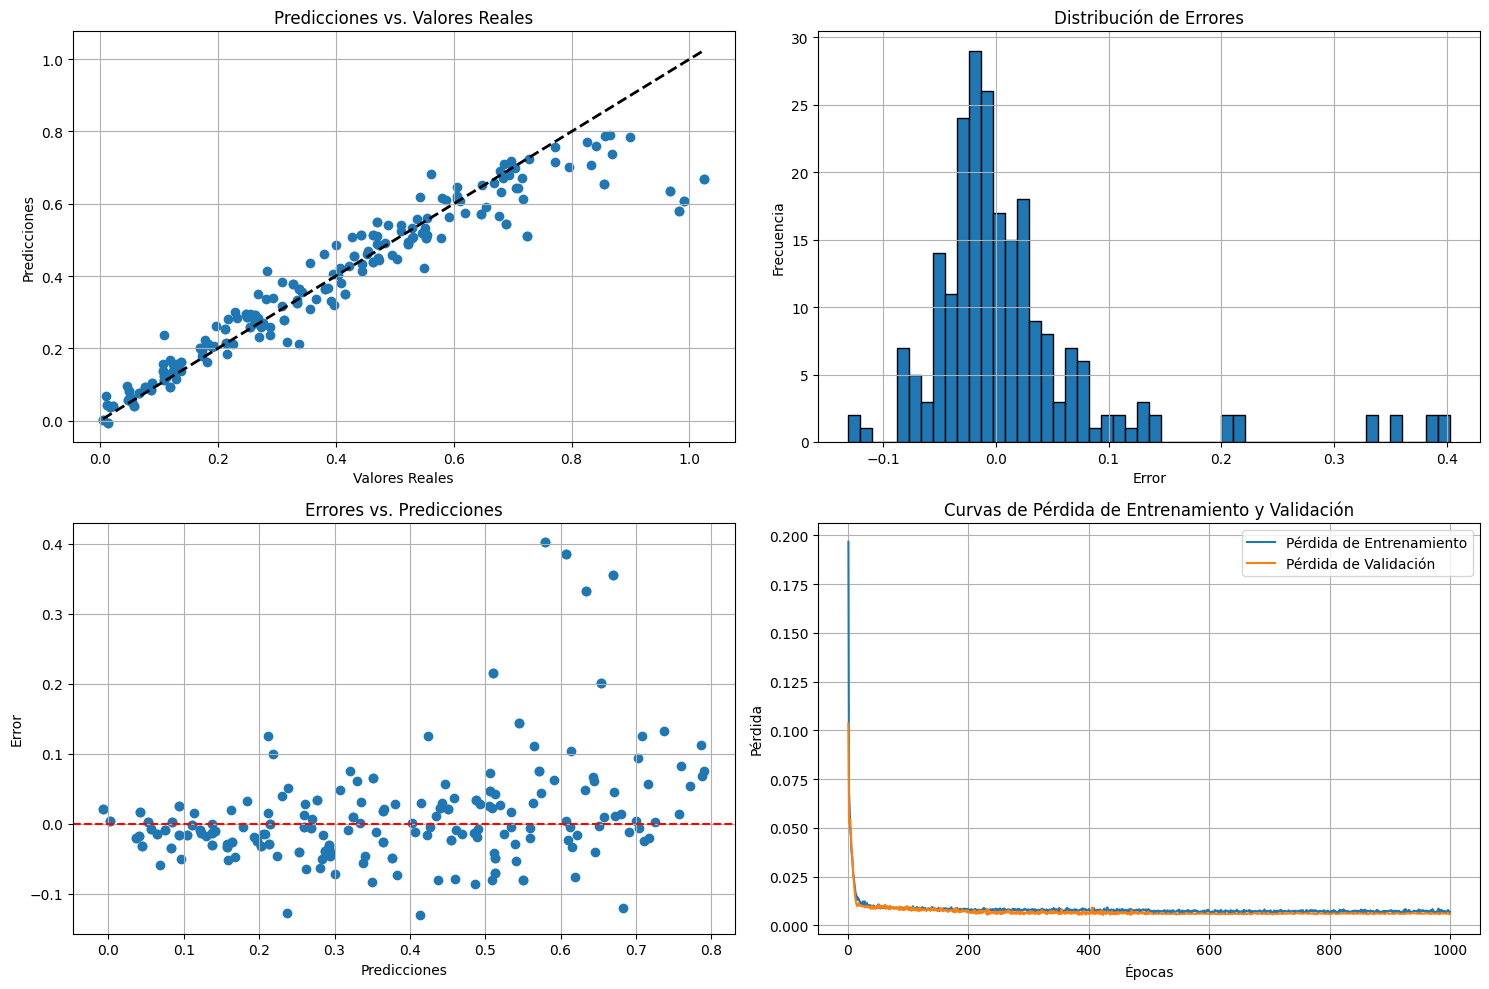

In [20]:
# === 6. Ejemplo de ejecución ===
model_name = config_dict['model type']
hyperparams = config_dict['hyperparams']
mode = config_dict['mode']
eval_metrics = config_dict['eval metrics']

model, y_pred = run_experiment(model_name, hyperparams, mode, eval_metrics)


Nueva configuración de hiperparametros:

    n_layers: 4

    n_neurons: 5

    activation: Tanh

    optimizer: Adam

    learning_rate: 0.01

    epochs: 1000


Modificamos internamente el .yml de configuración y lo volvemos a importar.

############################################
Modelo utilizado: neural_network
Configuración del modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'n_layers': 4, 'n_neurons': 5, 'activation': 'Tanh', 'optimizer': 'Adam', 'learning_rate': 0.01, 'epochs': 1000}, 'mode': 'manual', 'model_name': 'neural_network'}
Iniciando Cross-Validation con 5 folds.
Fold 1/5
  Fold 1, Epoch 0/1000, Training Loss: 0.213825, Validation Loss: 0.228422
  Fold 1, Epoch 100/1000, Training Loss: 0.218762, Validation Loss: 0.228422
  Fold 1, Epoch 200/1000, Training Loss: 0.215677, Validation Loss: 0.228422
  Fold 1, Epoch 300/1000, Training Loss: 0.219759, Validation Loss: 0.228422
  Fold 1, Epoch 400/1000, Training Loss: 0.212357, Validation Loss: 0.228422
  Fold 1, Epoch 500/1000, Training Loss: 0.216904, Validation Loss: 0.228422
  Fold 1, Epoch 600/1000, Training Loss: 0.219572, Validation Loss: 0.228422
  Fold 1, Epoch 700/1000, Training Loss: 0.212034, Validation Loss: 0.228

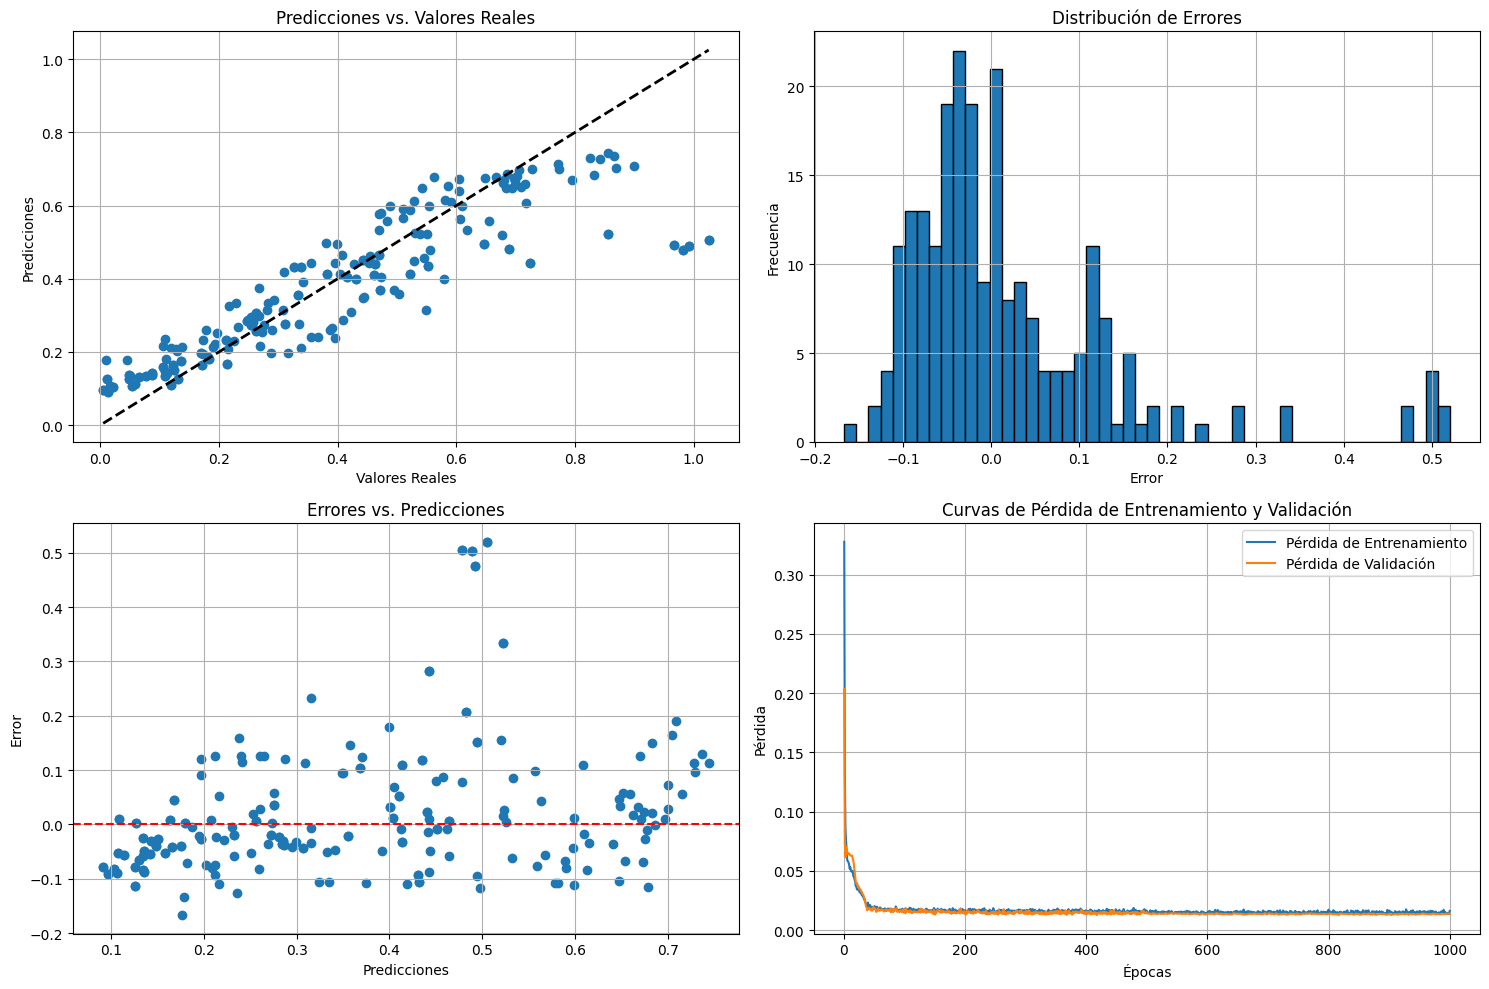

In [21]:
config_dict = loader.read_yml(idkrom_root_path + "/config.yml")

model_name = config_dict['model type']
hyperparams = config_dict['hyperparams']

model, y_pred = run_experiment(model_name, hyperparams, mode, eval_metrics)

# Pasamos a usar Gaussian Process

Configuración de hiperparametros:

      kernel: RBF 

      noise: 0.0001

      optimizer: fmin_l_bfgs_b


Modificamos internamente el .yml de configuración y lo volvemos a importar.

############################################
Modelo utilizado: gaussian_process
Configuración del modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'kernel': 'RBF', 'noise': 0.0001, 'optimizer': 'fmin_l_bfgs_b'}, 'mode': 'manual', 'model_name': 'gaussian_process'}
Modelo guardado en: d:\idkROM\idkROM\results\gaussian_process\gp_model.pkl
Standard deviation is 0.0111
Verificación de que y_test y y_pred tengan la misma forma:
Forma de y_test: (57, 4)
Forma de y_pred: (57, 4)
MSE en escala normalizada: 0.0008
MSE en porcentaje: 0.21%
Valor de BIC: -168.76
Este es el diccionario que se come el modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'kernel': 'RBF', 'noise': 0.0001, 'optimizer': 'fmin_l_bfgs_b'}, 'mode': 'manual', 'model_name': 'gaussian_process'}


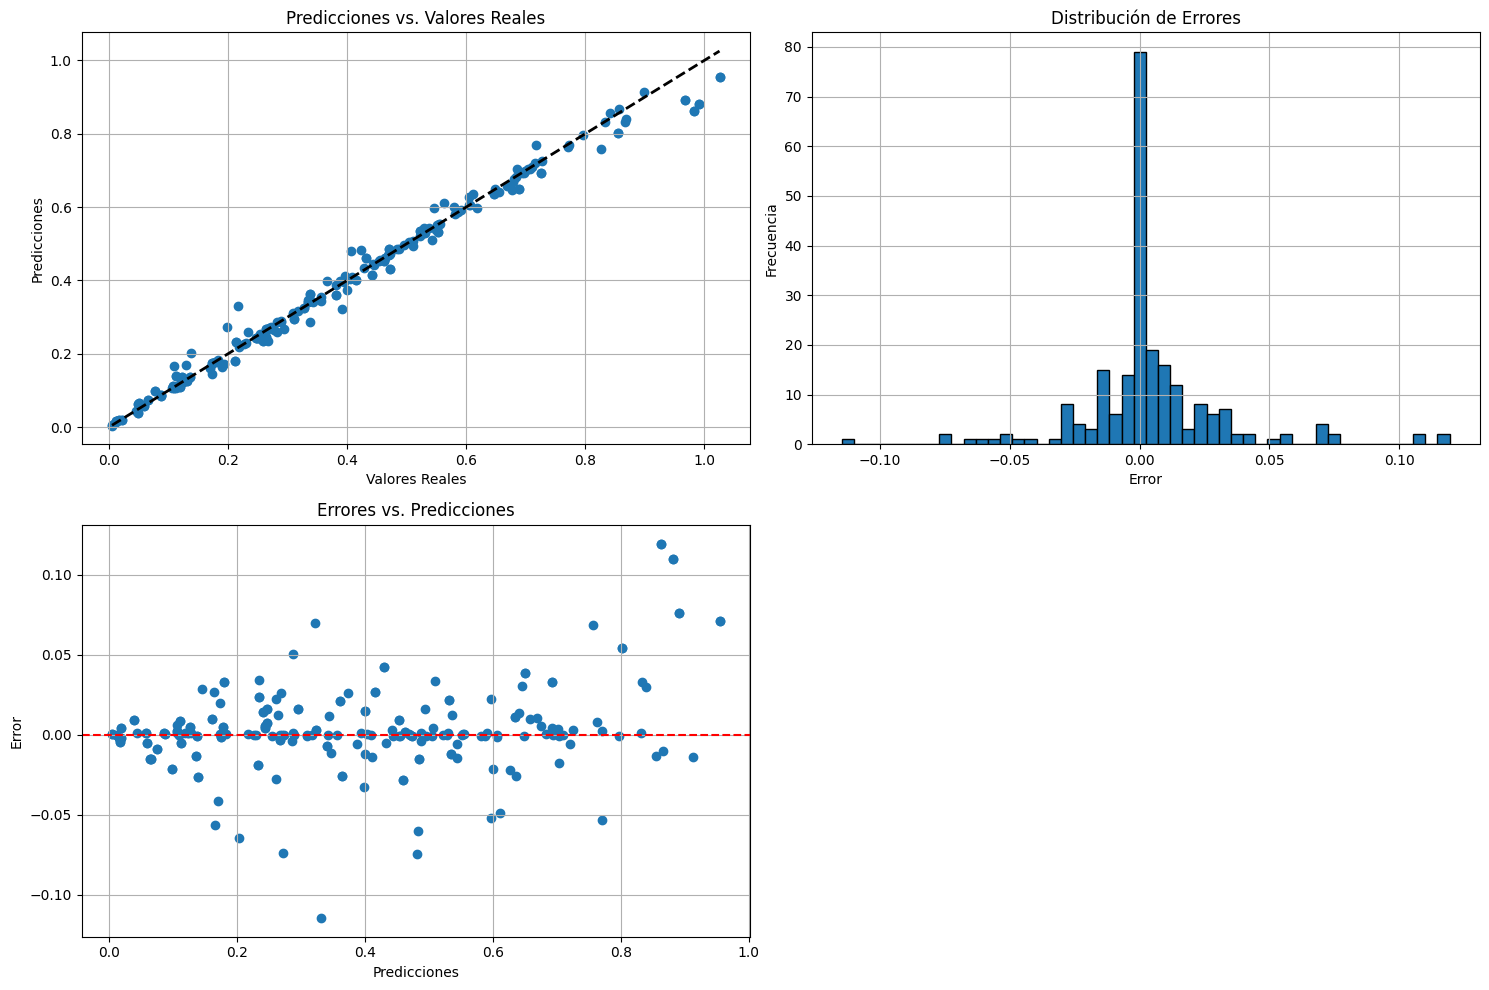

In [4]:
config_dict = loader.read_yml(idkrom_root_path + "/config.yml")

model_name = config_dict['model type']
hyperparams = config_dict['hyperparams']
mode = config_dict['mode']
eval_metrics = config_dict['eval metrics']


model, y_pred = run_experiment(model_name, hyperparams, mode, eval_metrics)

# Pasamos a usar Polynomial Response Surface

Configuración de hiperparametros:

      degree: 2 

Modificamos internamente el .yml de configuración y lo volvemos a importar.

############################################
Modelo utilizado: response_surface
Configuración del modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'degree': 2}, 'mode': 'manual', 'model_name': 'response_surface'}
Training MSE: 0.0009374771975449506
Validation MSE: 0.0012454621477838712
Model saved at: d:\idkROM\idkROM\results\response_surface\polynomial_model.pkl
Verificación de que y_test y y_pred tengan la misma forma:
Forma de y_test: (57, 4)
Forma de y_pred: (57, 4)
MSE en escala normalizada: 0.0029
MSE en porcentaje: 0.77%
Valor de BIC: -12.89
Diferencia entre Training Loss y Validation Loss: -32.85%
Este es el diccionario que se come el modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'degree': 2}, 'mode': 'manual', 'model_name': 'response_surface'}


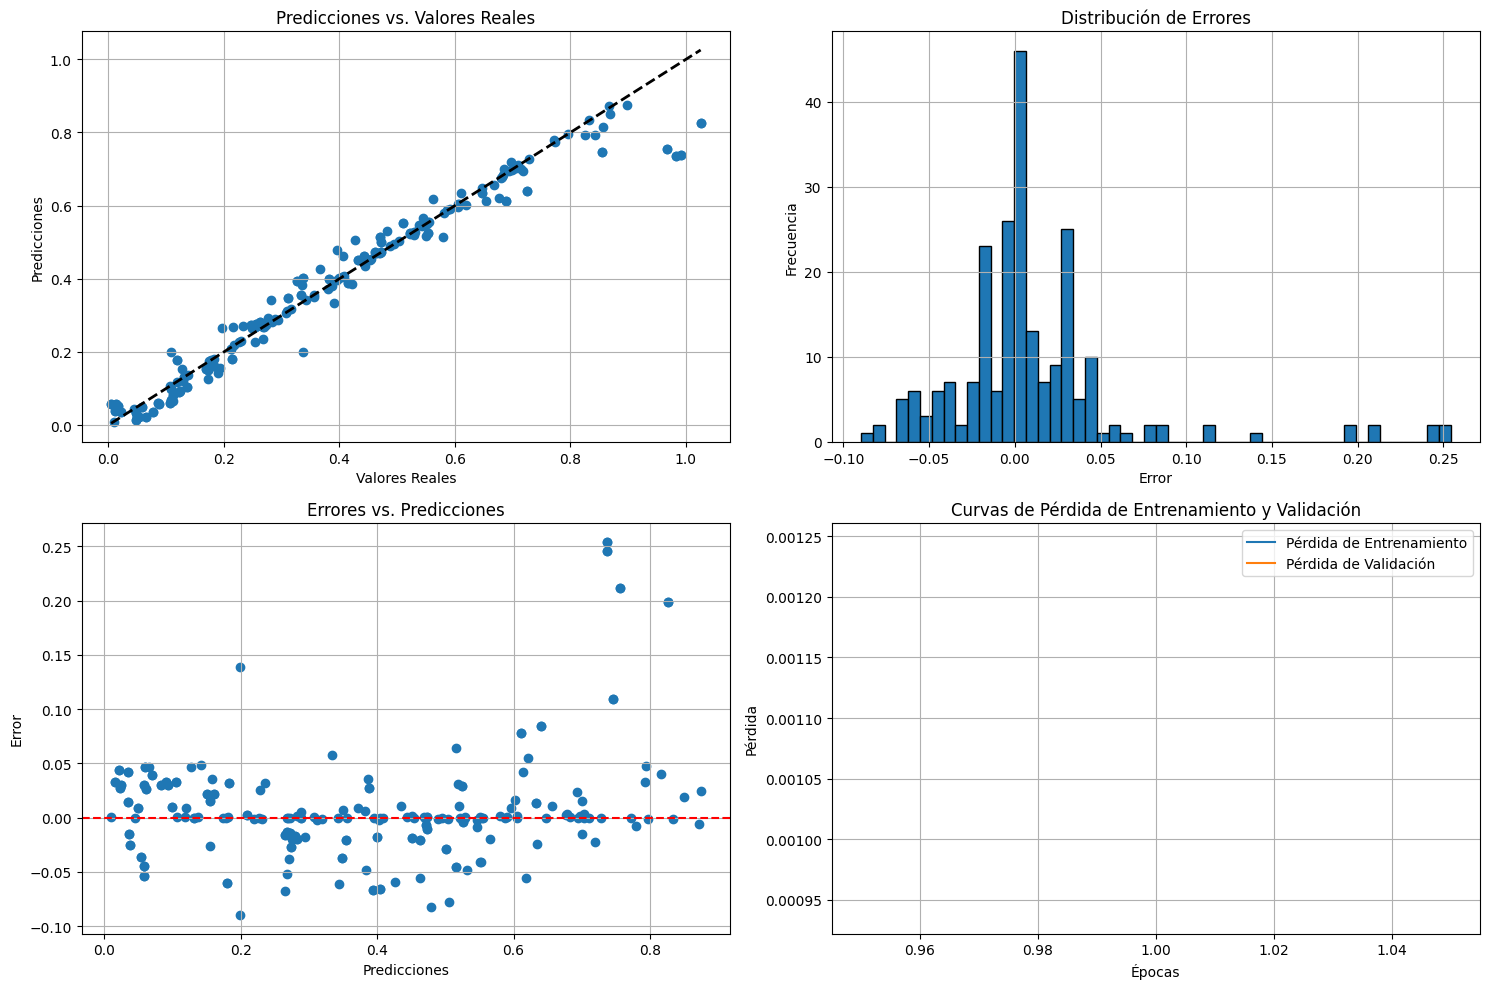

In [4]:
config_dict = loader.read_yml(idkrom_root_path + "/config.yml")

model_name = config_dict['model type']
hyperparams = config_dict['hyperparams']
mode = config_dict['mode']
eval_metrics = config_dict['eval metrics']


model, y_pred = run_experiment(model_name, hyperparams, mode, eval_metrics)

# Pasamos a usar Support Vector Regression

Configuración de hiperparametros:

      kernel: rbf

      C: 1.0

      epsilon: 0.1


Modificamos internamente el .yml de configuración y lo volvemos a importar.

############################################
Modelo utilizado: svr
Configuración del modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'kernel': 'rbf', 'C': 1.0, 'epsilon': 0.1}, 'mode': 'manual', 'model_name': 'svr'}
Entrenando modelo para la salida 1
Training MSE (salida 1): 0.0022979004656916388
Validation MSE (salida 1): 0.007579083353398573
Entrenando modelo para la salida 2
Training MSE (salida 2): 0.0036190401613866927
Validation MSE (salida 2): 0.0089144510671009
Entrenando modelo para la salida 3
Training MSE (salida 3): 0.0036190403828798273
Validation MSE (salida 3): 0.008914451690424279
Entrenando modelo para la salida 4
Training MSE (salida 4): 0.0035673346358114913
Validation MSE (salida 4): 0.012142362779847591
Modelos guardados en: d:\idkROM\idkROM\results\svr\svr_model.pkl
Verificación de que y_test y y_pred tengan la misma forma:
Forma de y_test: (57, 4)
Forma de y_pred: (57, 4)
MSE en escala normalizada: 0.0064
MSE en porcentaje: 1.67%


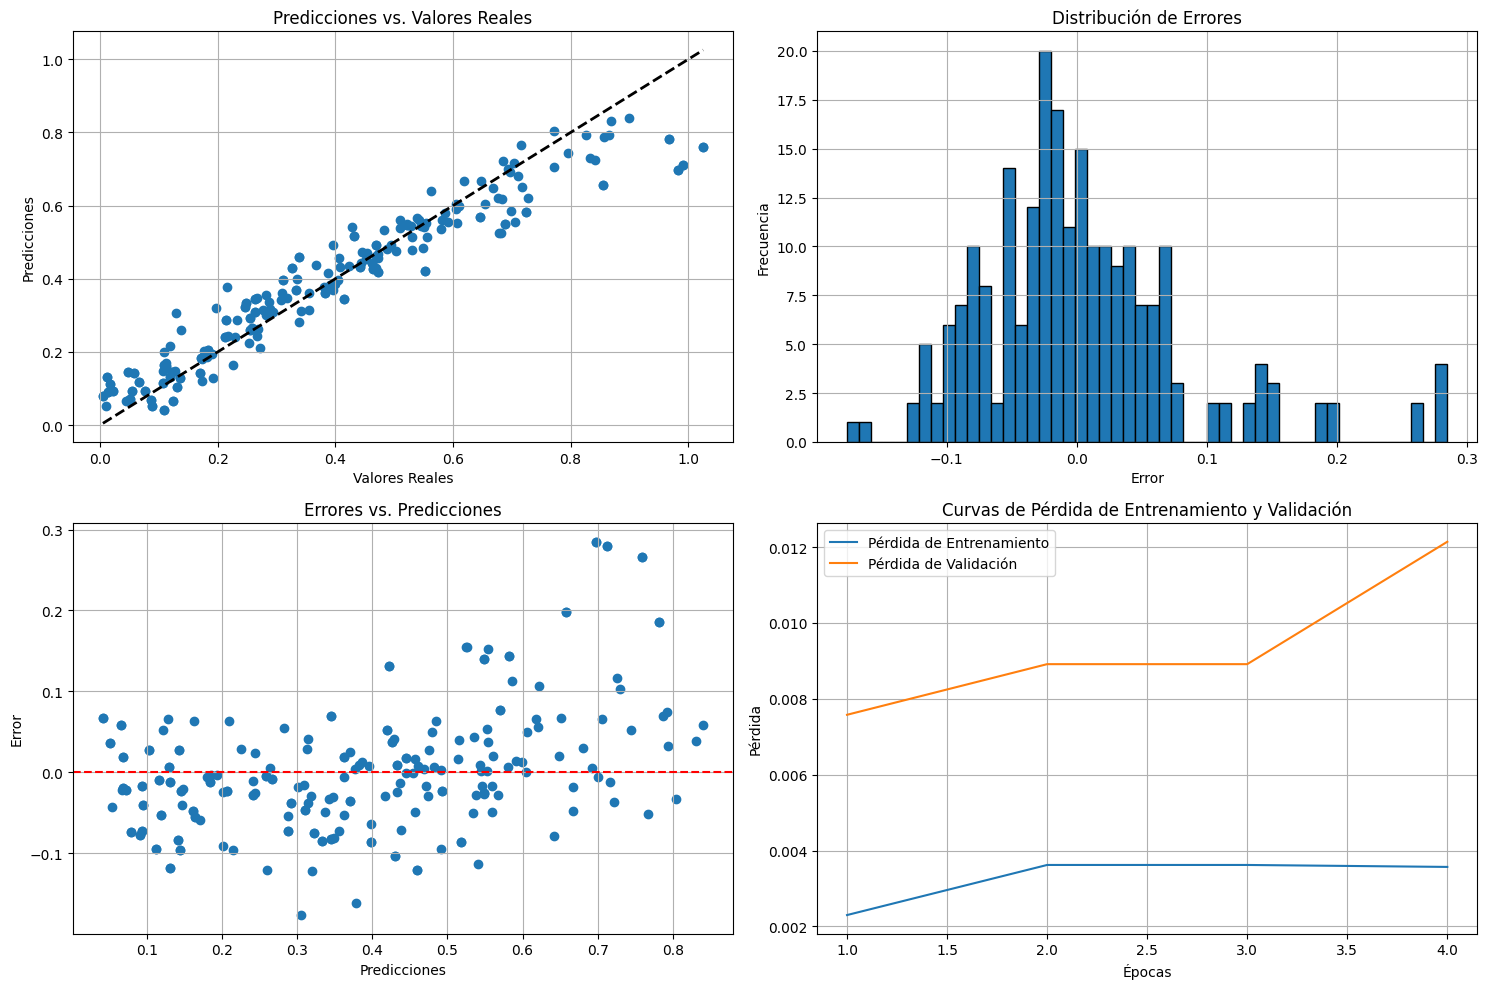

In [4]:
config_dict = loader.read_yml(idkrom_root_path + "/config.yml")

model_name = config_dict['model type']
hyperparams = config_dict['hyperparams']
mode = config_dict['mode']
eval_metrics = config_dict['eval metrics']


model, y_pred = run_experiment(model_name, hyperparams, mode, eval_metrics)

# Pasamos a usar Radial Basis Function

Configuración de hiperparametros:

      gamma: 1.0


Modificamos internamente el .yml de configuración y lo volvemos a importar.

############################################
Modelo utilizado: rbf
Configuración del modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'gamma': 1.0}, 'mode': 'manual', 'model_name': 'rbf'}
Training MSE: 1.0570842960876951e-20
Validation MSE: 0.005553313942676162
Model saved at: d:\idkROM\idkROM\results\rbf\rbf_model.pkl
Verificación de que y_test y y_pred tengan la misma forma:
Forma de y_test: (57, 4)
Forma de y_pred: (57, 4)
MSE en escala normalizada: 0.0028
MSE en porcentaje: 0.73%
Valor de BIC: 4197.15
Diferencia entre Training Loss y Validation Loss: -52534258272771293184.00%
Este es el diccionario que se consume el modelo: {'input_dim': 5, 'output_dim': 4, 'hyperparams': {'n_iter': 10, 'cv': 5, 'gamma': 1.0}, 'mode': 'manual', 'model_name': 'rbf'}


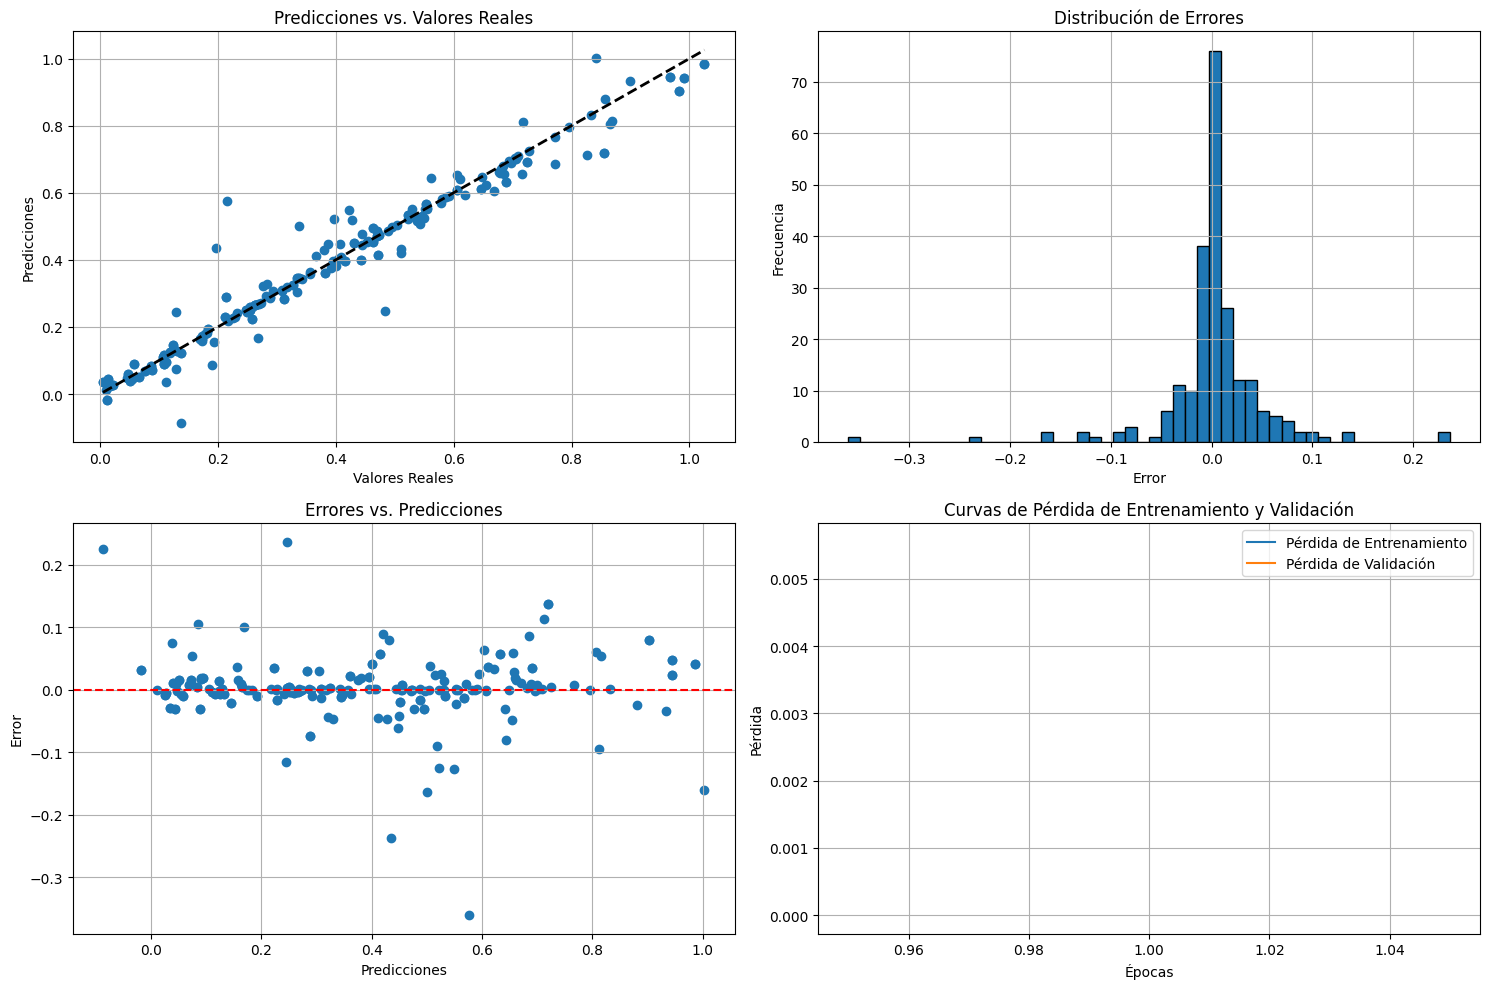

In [4]:
config_dict = loader.read_yml(idkrom_root_path + "/config.yml")

model_name = config_dict['model type']
hyperparams = config_dict['hyperparams']
mode = config_dict['mode']
eval_metrics = config_dict['eval metrics']


model, y_pred = run_experiment(model_name, hyperparams, mode, eval_metrics)